In [646]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
df_core_cpu_usage = pd.read_csv('csv/core-cpu-usage.csv',  delimiter=',', header=0)
df_core_cpu_usage['Time'] = pd.to_datetime(df_core_cpu_usage['Time'])
df_core_cpu_usage["free5gc"] = pd.to_numeric(df_core_cpu_usage['free5gc'])

In [647]:
df_cu_cpu_usage = pd.read_csv('csv/cu-cpu-usage.csv',  delimiter=',', header=0)
df_cu_cpu_usage['Time'] = pd.to_datetime(df_cu_cpu_usage['Time'])
df_cu_cpu_usage["cu"] = pd.to_numeric(df_cu_cpu_usage['cu'])

In [648]:
df_du_cpu_usage = pd.read_csv('csv/du-cpu-usage.csv',  delimiter=',', header=0)
df_du_cpu_usage['Time'] = pd.to_datetime(df_du_cpu_usage['Time'])
df_du_cpu_usage["du"] = pd.to_numeric(df_du_cpu_usage['du'])

In [649]:
df_ru_cpu_usage = pd.read_csv('csv/ru-cpu-usage.csv',  delimiter=',', header=0)
df_ru_cpu_usage['Time'] = pd.to_datetime(df_ru_cpu_usage['Time'])
df_ru_cpu_usage["ru"] = pd.to_numeric(df_ru_cpu_usage['ru'])

In [650]:
df_limits_cpu_usage = pd.read_csv('csv/limits-cpu-usage.csv',  delimiter=',', header=0)
df_limits_cpu_usage['Time'] = pd.to_datetime(df_limits_cpu_usage['Time'])
df_limits_cpu_usage["limits"] = pd.to_numeric(df_limits_cpu_usage['limits'])

In [651]:
df_core_mem_usage = pd.read_csv('csv/core-mem-usage.csv',  delimiter=',', header=0)
df_core_mem_usage['Time'] = pd.to_datetime(df_core_mem_usage['Time'])
df_core_mem_usage["free5gc"] = pd.to_numeric(df_core_mem_usage["free5gc"])

In [652]:
df_cu_mem_usage = pd.read_csv('csv/cu-mem-usage.csv',  delimiter=',', header=0)
df_cu_mem_usage['Time'] = pd.to_datetime(df_cu_mem_usage['Time'])
df_cu_mem_usage["cu"] = pd.to_numeric(df_cu_mem_usage["cu"])

In [653]:
df_du_mem_usage = pd.read_csv('csv/du-mem-usage.csv',  delimiter=',', header=0)
df_du_mem_usage['Time'] = pd.to_datetime(df_du_mem_usage['Time'])
df_du_mem_usage["du"] = pd.to_numeric(df_du_mem_usage["du"])

In [654]:
df_ru_mem_usage = pd.read_csv('csv/ru-mem-usage.csv',  delimiter=',', header=0)
df_ru_mem_usage['Time'] = pd.to_datetime(df_ru_mem_usage['Time'])
df_ru_mem_usage["ru"] = pd.to_numeric(df_ru_mem_usage["ru"])

In [655]:
df_limits_mem_usage = pd.read_csv('csv/limits-mem-usage.csv',  delimiter=',', header=0)
df_limits_mem_usage['Time'] = pd.to_datetime(df_limits_mem_usage['Time'])
df_limits_mem_usage["limits"] = pd.to_numeric(df_limits_mem_usage["limits"])

In [656]:
df_logs = pd.read_csv('csv/logs.csv',  delimiter='::', header=0)
df_logs['time'] = pd.to_datetime(df_logs['time'])
df_logs_count = df_logs.groupby(['time','kubernetes.container_name']).size().reset_index(name='counts')
df_logs_count_core = df_logs_count.loc[df_logs_count['kubernetes.container_name'] == 'free5gc']
df_logs_count_cu = df_logs_count.loc[df_logs_count['kubernetes.container_name'] == 'cu']
df_logs_count_du = df_logs_count.loc[df_logs_count['kubernetes.container_name'] == 'du']
df_logs_count_ru = df_logs_count.loc[df_logs_count['kubernetes.container_name'] == 'ru']

/home/vmadmin/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [657]:
df_logs_err = pd.read_csv('csv/logs-err.csv',  delimiter='::', header=0)
df_logs_err['time'] = pd.to_datetime(df_logs_err['time'])
df_logs_err_count = df_logs_err.groupby(['time','kubernetes.container_name']).size().reset_index(name='counts')

/home/vmadmin/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [658]:
all_seconds = pd.date_range('2022-01-17 23:25:00', '2022-01-17 23:31:00', freq='s')
df_logs_err_count.index = pd.DatetimeIndex(df_logs_err_count['time'])
df_logs_err_count = df_logs_err_count.reindex(all_seconds)
df_logs_err_count['kubernetes.container_name'] = df_logs_err_count['kubernetes.container_name'].fillna('du')
#df_logs_err_count['counts'] = df_logs_err_count['counts'].fillna(value=0)

In [659]:
df_iperf = pd.read_csv('csv/iperf.csv',  delimiter=';', header=0)
df_iperf['time'] = pd.to_datetime(df_iperf['time'])
df_iperf["Bandwidth(Mbits/s)"] = pd.to_numeric(df_iperf["Bandwidth(Mbits/s)"])

Text(15, 15, 'Stopped Iperf')

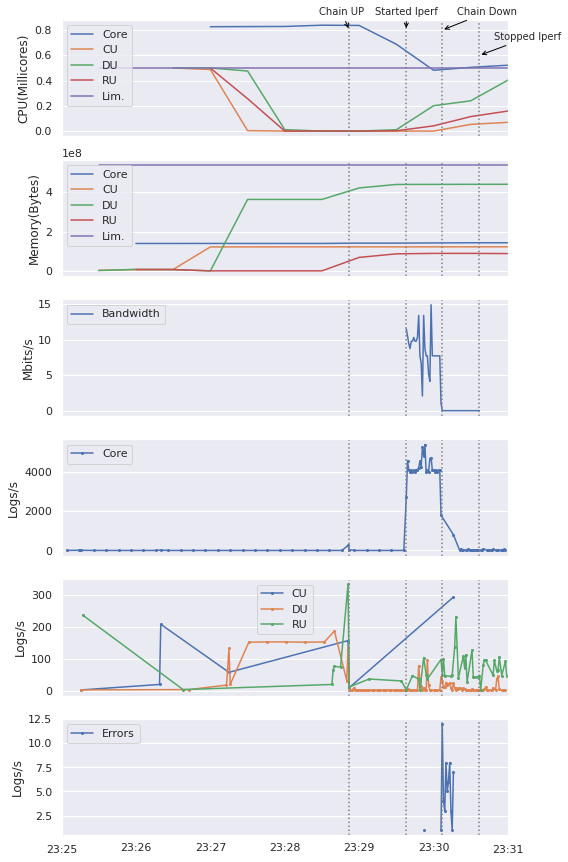

In [660]:
fig, axes = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(8,15))
axes[0].set_xlabel('Time')

df_core_cpu_usage.plot(kind='line', y='free5gc', x='Time',label='Core', ax=axes[0])
df_cu_cpu_usage.plot(kind='line', y='cu', x='Time',label='CU', ax=axes[0])
df_du_cpu_usage.plot(kind='line', y='du', x='Time',label='DU', ax=axes[0])
df_ru_cpu_usage.plot(kind='line', y='ru', x='Time',label='RU', ax=axes[0])
df_limits_cpu_usage.plot(kind='line', y='limits', x='Time',label='Lim.', ax=axes[0])
axes[0].set_ylabel('CPU(Millicores)')

df_core_mem_usage.plot(kind='line', y='free5gc', x='Time',label='Core', ax=axes[1])
df_cu_mem_usage.plot(kind='line', y='cu', x='Time',label='CU', ax=axes[1])
df_du_mem_usage.plot(kind='line', y='du', x='Time',label='DU', ax=axes[1])
df_ru_mem_usage.plot(kind='line', y='ru', x='Time',label='RU', ax=axes[1])
df_limits_mem_usage.plot(kind='line', y='limits', x='Time',label='Lim.', ax=axes[1])
axes[1].set_ylabel('Memory(Bytes)')

df_iperf.plot(kind='line',x='time',y='Bandwidth(Mbits/s)', label='Bandwidth' , ax=axes[2])
axes[2].set_ylabel('Mbits/s')

df_logs_count_core.plot(kind='line',x='time',y='counts',label='Core', marker='o', ms=2, ax=axes[3])
axes[3].set_ylabel('Logs/s')

df_logs_count_cu.plot(kind='line', x='time', y='counts', label='CU', marker='o', ms=2, ax=axes[4])
df_logs_count_du.plot(kind='line', x='time', y='counts', label='DU', marker='o', ms=2, ax=axes[4])
df_logs_count_ru.plot(kind='line', x='time', y='counts', label='RU', marker='o', ms=2, ax=axes[4])
axes[4].set_ylabel('Logs/s')

df_logs_err_count.plot(kind='line', y='counts', label='Errors', marker='o', ms=2,ax=axes[5])#,marker='o',linestyle='none',color='red',ms=3
axes[5].set_ylabel('Logs/s')

for each in axes:
    each.axvline('2022-01-17 23:28:52',linestyle ="dotted", color='tab:gray')
    each.axvline('2022/01/17 23:29:38',linestyle ="dotted", color='tab:gray')
    each.axvline('2022/01/17 23:30:07',linestyle ="dotted", color='tab:gray')
    each.axvline('2022/01/17 23:30:37',linestyle ="dotted", color='tab:gray')


axes[0].annotate('Chain UP', xy=('2022-01-17 23:28:52',0.80), xytext=(15, 15), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'), fontsize=10, horizontalalignment="right")
axes[0].annotate('Started Iperf', xy=('2022/01/17 23:29:38',0.80), xytext=(0, 15), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'), fontsize=10, horizontalalignment="center")
axes[0].annotate('Chain Down', xy=('2022/01/17 23:30:07',0.80), xytext=(15, 15), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
axes[0].annotate('Stopped Iperf', xy=('2022/01/17 23:30:37',0.60), xytext=(15, 15), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

